In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

# The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

data = pd.read_csv('full_data_with_dates.csv')


In [2]:
data['convert_to_date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Day'] = data['convert_to_date'].dt.day
data['Month'] = data['convert_to_date'].dt.month
data['Year'] = data['convert_to_date'].dt.year

In [3]:
small_data = data.set_index('convert_to_date')

In [4]:
def mean_absolute_percentage_error(y_true, y_pred):
    
    s=0
    n=0
    for i in range(len(y_true)):
        if y_true[i]!=0:
                #print(y_pred[i],y_true[i])
                s+=abs((y_true[i]-y_pred[i])/y_true[i])
                #print(s)
                n+=1
    #print(s,n)            
    return (s/n)*100           
            
    
def sum_squared_error(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

5.267162444271922
85097784.9236111


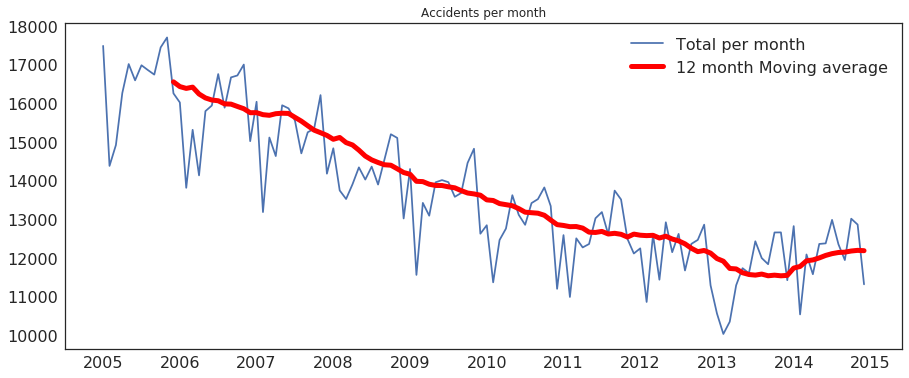

In [5]:
plt.figure(figsize=(15,6))
actual=small_data.resample('M').size()#.plot(label='Total per month')
predicted=small_data.resample('M').size().rolling(window=12).mean()#.plot(color='red',linewidth=5,label='12 month Moving average')
actual.plot(label='Total per month')
predicted.plot(color='red',linewidth=5,label='12 month Moving average')
plt.title('Accidents per month')
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)
#print(actual[12:].shape,predicted[:-12].shape)
print(mean_absolute_percentage_error(actual[12:], predicted[12:]))
print(sum_squared_error(actual[12:], predicted[12:]))

In [ ]:
data.columns

In [6]:
small_data = data[['convert_to_date','Accident_Severity']]
small_data = small_data.dropna(axis=0)

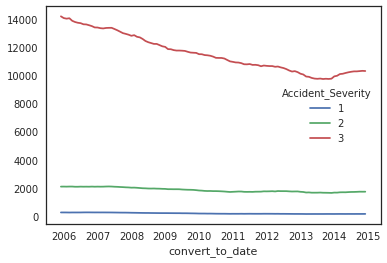

In [7]:
small_data.pivot_table(values='Accident_Severity', index='convert_to_date', columns='Accident_Severity',aggfunc=len).resample('M').sum().rolling(window=12).mean().plot()